In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, balanced_accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import os
from sklearn.model_selection import GridSearchCV
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import hyperopt.pyll.stochastic
import optuna

In [199]:
df = pd.read_csv(os.path.join("data", "master_data.csv"))
df

,Unnamed: 0,Name,Age,Tm,G,R,H,HR,RBI,SB,...,BA,SLG,OPS,Year,ID,WPA,RS%,SB%,ISO,allstars
0,0,Bobby Abreu,40.0,NYM,78,12,33,1,14,1,...,0.248,0.338,0.680,2014,Bobby Abreu2014,0.2,21%,100%,0.090,0
1,1,José Abreu,27.0,CHW,145,80,176,36,107,3,...,0.317,0.581,0.964,2014,José Abreu2014,4.4,22%,75%,0.264,1
2,2,Dustin Ackley,26.0,SEA,143,64,123,14,65,8,...,0.245,0.398,0.692,2014,Dustin Ackley2014,0.0,34%,67%,0.153,0
3,3,Matt Adams,25.0,STL,142,55,152,15,68,3,...,0.288,0.457,0.779,2014,Matt Adams2014,1.5,24%,60%,0.169,0
4,4,Jim Adduci,29.0,TEX,44,13,17,1,8,3,...,0.168,0.228,0.467,2014,Jim Adduci2014,-0.9,43%,75%,0.059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,3731,Andrew Young,27.0,ARI,58,13,19,6,15,0,...,0.209,0.484,0.782,2021,Andrew Young2021,-0.7,28%,NaN,0.275,0
3732,3732,Seby Zavala,27.0,CHW,37,15,17,5,15,0,...,0.183,0.376,0.616,2021,Seby Zavala2021,-0.3,50%,NaN,0.194,0
3733,3733,Bradley Zimmer,28.0,CLE,99,44,68,8,35,15,...,0.227,0.344,0.669,2021,Bradley Zimmer2021,0.0,33%,83%,0.117,0
3734,3734,Ryan Zimmerman,36.0,WSN,110,27,62,14,46,0,...,0.243,0.471,0.756,2021,Ryan Zimmerman2021,0.5,20%,NaN,0.227,0


In [200]:
df['RS%'] = df['RS%'].str.rstrip('%').astype('float') / 100.0

In [201]:
df['SB%'] = df['SB%'].str.rstrip('%').astype('float') / 100.0

In [202]:
df = df.dropna()
df

,Unnamed: 0,Name,Age,Tm,G,R,H,HR,RBI,SB,...,BA,SLG,OPS,Year,ID,WPA,RS%,SB%,ISO,allstars
0,0,Bobby Abreu,40.0,NYM,78,12,33,1,14,1,...,0.248,0.338,0.680,2014,Bobby Abreu2014,0.2,0.21,1.00,0.090,0
1,1,José Abreu,27.0,CHW,145,80,176,36,107,3,...,0.317,0.581,0.964,2014,José Abreu2014,4.4,0.22,0.75,0.264,1
2,2,Dustin Ackley,26.0,SEA,143,64,123,14,65,8,...,0.245,0.398,0.692,2014,Dustin Ackley2014,0.0,0.34,0.67,0.153,0
3,3,Matt Adams,25.0,STL,142,55,152,15,68,3,...,0.288,0.457,0.779,2014,Matt Adams2014,1.5,0.24,0.60,0.169,0
4,4,Jim Adduci,29.0,TEX,44,13,17,1,8,3,...,0.168,0.228,0.467,2014,Jim Adduci2014,-0.9,0.43,0.75,0.059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,3727,Kolten Wong,30.0,MIL,116,70,121,14,50,12,...,0.272,0.447,0.783,2021,Kolten Wong2021,0.2,0.37,0.71,0.175,0
3728,3728,Austin Wynns,30.0,BAL,45,14,24,4,14,1,...,0.185,0.308,0.540,2021,Austin Wynns2021,-1.4,0.36,1.00,0.123,0
3729,3729,Mike Yastrzemski,30.0,SFG,139,75,105,25,71,4,...,0.224,0.457,0.768,2021,Mike Yastrzemski2021,-0.2,0.36,1.00,0.233,0
3730,3730,Christian Yelich,29.0,MIL,117,70,99,9,51,9,...,0.248,0.373,0.736,2021,Christian Yelich2021,0.7,0.37,0.75,0.125,0


In [203]:
train, test = train_test_split(df)

In [206]:
xcols = ["Age", "G", "R", "H", "HR", "RBI", "SB", "SO", "BA", "SLG", "OPS", "WPA", "RS%", "SB%", "ISO"]
xcols_alt = ["R", "H", "HR", "RBI", "SO", "BA", "OPS"]


In [212]:
model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression())
])
model.fit(train[xcols], train["allstars"])
model.score(test[xcols], test["allstars"])

print(f"Train Accuracy: {model.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {model.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 92.586%
Valid Accuracy: 93.141%


<AxesSubplot:>

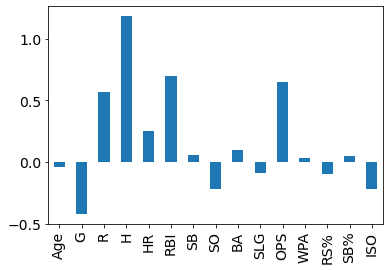

In [213]:
pd.Series(model["logr"].coef_.reshape(-1), index=xcols).plot.bar()

In [218]:
model = Pipeline([
    ("std", StandardScaler()),
    ("logr", LogisticRegression())
])
model.fit(train[xcols_alt], train["allstars"])
model.score(test[xcols_alt], test["allstars"])

print(f"Train Accuracy: {model.score(train[xcols_alt], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {model.score(test[xcols_alt], test['allstars'])*100:0.3f}%")

Train Accuracy: 92.769%
Valid Accuracy: 93.278%


<AxesSubplot:>

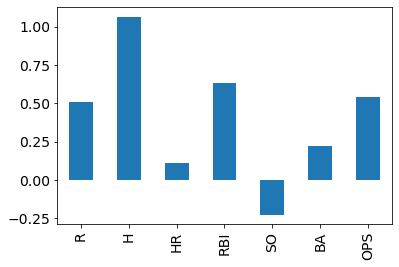

In [219]:
pd.Series(model["logr"].coef_.reshape(-1), index=xcols_alt).plot.bar()

In [154]:
df_pca = df[xcols].dropna()

In [155]:
pca = PCA(n_components = 11)
pca.fit(df_pca)
key_df = pd.DataFrame(pca.components_)

In [156]:
arr = pca.transform(df_pca)
data_df = pd.DataFrame(arr)

In [157]:
pca.explained_variance_ratio_.round(2)

array([0.86, 0.07, 0.03, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [158]:
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)

In [159]:
pca = PCA(n_components = 7)
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)
pca.explained_variance_ratio_.round(3)

array([0.864, 0.073, 0.03 , 0.017, 0.009, 0.004, 0.002])

In [160]:
pca = PCA(n_components = 7, whiten = False)
data_df = pd.DataFrame(pca.fit_transform(df_pca))
key_df = pd.DataFrame(pca.components_)
pca.explained_variance_ratio_.round(3)

array([0.864, 0.073, 0.03 , 0.017, 0.009, 0.004, 0.002])

In [161]:
component_list = [1,2,3,4,5,6,7,8,9,10,11]

1     0.864433
2     0.937902
3     0.968156
4     0.984768
5     0.993375
6     0.997150
7     0.998776
8     0.999858
9     0.999988
10    0.999999
11    1.000000
12    1.000000
13    1.000000
14    1.000000
15    1.000000
dtype: float64
1     0.507041
2     0.625694
3     0.723272
4     0.791285
5     0.854895
6     0.906794
7     0.939852
8     0.971555
9     0.983331
10    0.990562
11    0.994101
12    0.997446
13    0.999354
14    0.999978
15    1.000000
dtype: float64


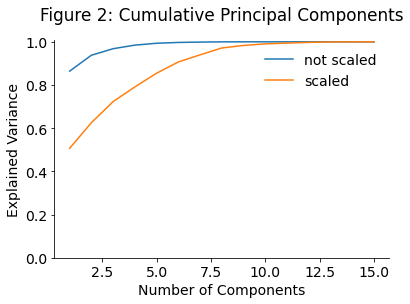

In [162]:
def explained(scale):
    stages = [("imp", SimpleImputer(strategy="most_frequent"))]
    if scale:
        stages.append(("std", StandardScaler()))
    stages.append(("pca", PCA()))
    p = Pipeline(stages)
    p.fit(df[xcols])
    #print(p["pca"].components_.round(2))
    explained = p["pca"].explained_variance_
    s = pd.Series(explained.cumsum() / explained.sum(),
                  index=range(1, len(xcols)+1))
    print(s)
    return s
plt.rcParams.update({'font.size': 14})
ax = explained(False).plot.line(label="not scaled", ylim=0)
explained(True).plot.line(label="scaled", ax=ax)
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(frameon=False)
ax.set_title("Figure 2: Cumulative Principal Components", pad=20)

plt.savefig("Fig 2.png", bbox_inches = 'tight')

In [163]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {knn.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 93.455%
Valid Accuracy: 91.221%


In [164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=12, random_state=0, n_estimators = 100, criterion = "gini", bootstrap = True, min_samples_split = 4, max_features = "sqrt")
clf.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {clf.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {clf.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 99.314%
Valid Accuracy: 92.318%


In [175]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=12, max_features = "auto")
dtc.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {dtc.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {dtc.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 99.405%
Valid Accuracy: 89.300%


In [183]:
dtc = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': [1, 2, 3, 4],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 24, None],
    'max_features': ["auto","sqrt", "log2", None],
    'criterion': ["gini", "entropy"]
}


grid = GridSearchCV(estimator=dtc,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

grid.fit(train[xcols], train['allstars'])

grid.best_score_

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_s

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_d

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=12, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=12, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=16, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=24, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=g

[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=1; total time=   0.0s


[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, min_samples_split=2; total time=   0.0s


[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=3; total time=   0.0s


[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_split=1; total time=   0.0s


[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_split=3; total time=   0.0s


[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=2; total time=   0.0s


[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=None, min_samples_split=3; total time=   0.0s


[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_split=1; total time=   0.0s


[CV] END criterion=entropy, max_depth=8, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=1; total time

[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, max_features=log2, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_split=4; total tim

[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_split=1; total tim

[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=sqrt, min_samples_split=3; total tim

[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=24, max_features=None, min_samples_split=4; total tim

[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=log2, min_sample

c:\users\olson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\olson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\olson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\users\olson\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\tree\_c

0.9199111893092035

In [184]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 2}

In [185]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, max_features = "auto", min_samples_split=2, criterion='entropy')
dtc.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {dtc.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {dtc.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 91.076%
Valid Accuracy: 90.398%


In [177]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

mlp = MLPClassifier(random_state=0, max_iter = 300)
mlp.fit(train[xcols], train["allstars"])
print(f"Train Accuracy: {mlp.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {mlp.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 92.449%
Valid Accuracy: 92.455%


In [178]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(train[xcols], train["allstars"])

print(f"Train Accuracy: {ada.score(train[xcols], train['allstars'])*100:0.3f}%")
print(f"Valid Accuracy: {ada.score(test[xcols], test['allstars'])*100:0.3f}%")

Train Accuracy: 92.815%
Valid Accuracy: 92.044%


In [9]:
def optimization_objective(trial, X_train, y_train, cv=5):

    
    params =  {
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_impurity_decrease': trial.suggest_uniform('min_impurity_decrease', 0.0, 0.5),
        'max_depth': trial.suggest_categorical('max_depth', [6, 16, None])
    }

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(cv_iterator.split(X_train, y_train)):
        
        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]
        

        model = DecisionTreeClassifier(**params, random_state=123)
        model.fit(X_train_sub, y_train_sub)
        preds = model.score(X_valid, y_valid)
        
        cv_scores[idx] = preds

    return np.mean(cv_scores)